# Newton Raphson

In numerical analysis, Newton's method, also known as the Newton–Raphson method is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a real-valued function. The most basic version starts with a single-variable function f defined for a real variable x, the function's derivative f′, and an initial guess x0 for a root of f. If the function satisfies sufficient assumptions and the initial guess is close, then

$$ x_{1}= x_{0}-\frac {f(x_{0})}{f'(x_{0})}$$
is a better approximation of the root than x0. Geometrically, (x1, 0) is the intersection of the x-axis and the tangent of the graph of f at (x0, f(x0)): that is, the improved guess is the unique root of the linear approximation at the initial point. The process is repeated as

$$x_{n+1}=x_{n}-\frac {f(x_{n})}{f'(x_{n})}$$


# My implementation

using **numpy** below is another implementation that I found on **GitHub**.

The **%%timeit** command lets you test how fast code runs: this is called
[benchmarking](https://www.tutorialspoint.com/concurrency_in_python/concurrency_in_python_benchmarking_and_profiling.htm) and it's very easy to do in **Jupyter**.


In [84]:
(np.identity(3) + np.ones((3,3)) )/ np.array([3,2,1])

array([[0.66666667, 0.5       , 1.        ],
       [0.33333333, 1.        , 1.        ],
       [0.33333333, 0.5       , 2.        ]])

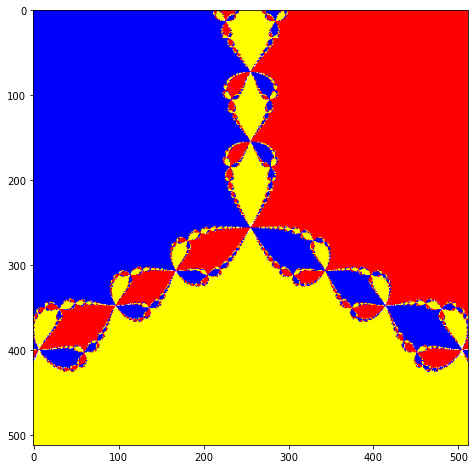

In [54]:
#%%timeit

# zeroes of  z -> z^3 - 1

npts = 512
X = np.linspace(-2, 2, npts)
Y = np.linspace(-2, 2, npts)

#broadcast X,Y to a square array
C = X[:, None] + 1J*Y


#Newton for z -> z^3 - 1
max_iter = 20
for k in range(max_iter):
    C = C - (C**3 - 1)/ (3 * C**2)

#make a blank rgb image
im = np.zeros((C.shape[0],
               C.shape[1],
               3))

# set colors according to the basin of attraction
im[C.imag > 0,0] = 1
im[C.imag < 0,2] = 1

yellow = C.real > 0 
im[yellow,1] = 1
im[yellow,0] = 1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.imshow(im)

#plt.savefig("newton.png")

In [74]:
#%%timeit

# zeroes of  z -> z^3 - 1

npts = 512
X = np.linspace(-2, 2, npts)
Y = np.linspace(-2, 2, npts)

#broadcast X,Y to a square array
NN = X[:, None] + 1J*Y

def do_frame(t=1):
    C = NN.copy()

    max_iter = 40
    # deformation of z -> z^4 - 1
    for k in range(max_iter):
        U = C**2
        C = C - (U + 1)*(U - t)/  (2*C * (2*U + (1-t)))
        
    #make a blank rgb image
    im = np.zeros((C.shape[0],
                   C.shape[1],
                   3))

    # set colors according to the basin of attraction
    im[C.imag > 0, 0] = 1 #R
    im[C.imag < 0, 2] = 1 #B

    yellow = C.real > 0 
    im[yellow,1] = 1
    im[yellow,0] = 1
    return im

frames = [do_frame(t=s) for s in np.linspace(4,.1,40)]

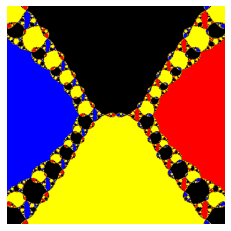

In [85]:
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

#frames = imgs

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

anim = plot_images(frames).to_html5_video()
#HTML()

In [86]:
with open("newton_frac.html", "w") as fp:
    fp.write(anim)

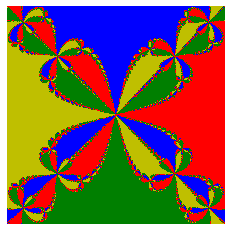

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)


(512, 512)